# Hypothesis Testing

https://www.youtube.com/watch?v=2GU_R7G5m-8&list=PLTNMv857s9WXg9tRi7wHU9cMgL1x140dO&index=3

## Testing for μ when σ is known.

### Z-statistic

In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from scipy import stats

%matplotlib inline

## $$z = \frac{\overline X-\mu}{\sigma/\sqrt{n}}$$

$\mu$ - population mean

$\sigma$ - population standard deviation

### calculations of z-value from p-value and inverse:

A low p-value makes our default action look improbable.

In [2]:
# probability to z
probability = 0.05
n_sided = 2 # 2-sided test
z = stats.norm.ppf(1-probability/n_sided)
print(z) # 1.959963984540054

# z to probability
probability = stats.norm.sf(z) * n_sided
print(probability) # 0.05

1.959963984540054
0.05


### example 1 - one-sided test

The manager of a department store is thinking about establishing a new billing system for the store's credit customers. She determines that the new system will be cost effective only if the mean monthly account is greater than 70USD. A random sample of 200 monthly accounts is drawn for which the sample mean account is 74USD. The manager knows that the accounts are normally distributed with a standard deviation of 30USD. Is there enough evidence at the 5% level of significance to conclude that the new system will be cost effective?

so we have:

$$H_0: \mu = 70$$
$$H_1: \mu > 70$$

In [3]:
mu_population = 70  # expected population mean
sigma_population = 30  # expected population standard deviation

n = 200
mean_sample = 74

n_sided = 1  # because it's right-sided test
alpha = 0.05

z_critical = stats.norm.ppf(1 - alpha / n_sided)  # calculation of boundaries of critical area in z-scale
z = (mean_sample - mu_population) / (sigma_population / (n ** 0.5))  # calculation of z-value

# z to p_value
p_value = (1 - stats.norm.cdf(abs(z))) * n_sided
# p_value = stats.norm.sf(abs(z)) * n_sided  # alternative form

print(f'z critical:\t {z_critical}')
print('z-value:\t', z)
print('p-value:\t', p_value)
print('z-value or p-value not in critical area\n:\t\t', z < z_critical and p_value > alpha)

z critical:	 1.6448536269514722
z-value:	 1.885618083164127
p-value:	 0.029673219395959904
z-value or p-value not in critical area
:		 False


#### let's illustrate our findings with the following plot:

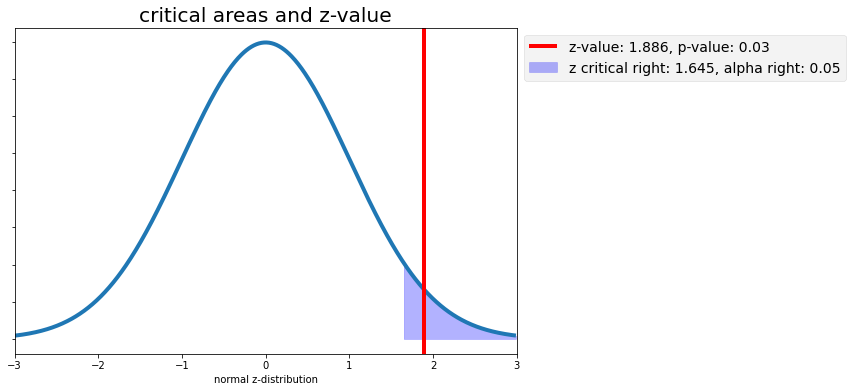

In [4]:
# defining x and y
normal_distribution = pd.DataFrame({
    'x': np.arange(-3, 3, 0.01),
    'y': stats.norm.pdf(np.arange(-3, 3, 0.01), 0, 1)
})

x = normal_distribution['x']
y = normal_distribution['y']

# establishing critical areas
# left:
# x_critical_left = normal_distribution.loc[normal_distribution['x'] < -z_critical, 'x']
# y_critical_left = normal_distribution.loc[normal_distribution['x'] < -z_critical, 'y']
# right:
x_critical_right = normal_distribution.loc[normal_distribution['x'] > z_critical, 'x']
y_critical_right = normal_distribution.loc[normal_distribution['x'] > z_critical, 'y']



# building the plot
fig, ax = plt.subplots(figsize=(9,6))
plt.style.use('fivethirtyeight')
ax.plot(x, y)

# painting critical areas
# left:
# ax.fill_between(x_critical_left, y_critical_left, 0, alpha=0.3, color='b', 
#                 label=f'z critical left: {round(-z_critical, 3)}')
# right:
ax.fill_between(x_critical_right, y_critical_right, 0, alpha=0.3, color='b', 
                label=f'z critical right: {round(z_critical, 3)}, alpha right: {alpha/n_sided}')

# drawing z-value line
ax.axvline(x=z, color='r', label=f'z-value: {round(z, 3)}, p-value: {round(p_value, 3)}')

# decorating the plot
ax.set_xlim([-3, 3])
ax.set_xlabel('normal z-distribution')
ax.set_yticklabels([])  # to remove y-bar
ax.set_title('critical areas and z-value')
ax.legend(bbox_to_anchor = (1.0, 1), loc='upper left')

# plt.savefig('normal_curve.png', dpi=72, bbox_inches='tight')
plt.show()

we reject $H_0$ at 5% of significance as z (1.88) $\not<$ z_critical (1.64) or p-value (0.029) $\not>$ alpha (0.05)

### example 2 - two-sided test

A road is being built, and it's expected to have 8500 cars/day. In the first 30 days of its operation there were 8120 cars/day. Using 1% level of significance, test whether the expectations were incorrect. Assume that the distribution of daily road users  is normally distributed with a standard deviation of 950.

so we have:

$$H_0: \mu = 8500$$
$$H_1: \mu \not= 8500$$

In [5]:
mu_population = 8500  # expected population mean
sigma_population = 950  # expected population standard deviation

n = 30
mean_sample = 8120

n_sided = 2  # because it's two-sided test
alpha = 0.01

z_critical = stats.norm.ppf(1 - alpha / n_sided)  # calculation of boundaries of critical area in z-scale
z = (mean_sample - mu_population) / (sigma_population / (n ** 0.5))  # calculation of z-value

# z to p_value
p_value = (1 - stats.norm.cdf(abs(z))) * n_sided
# p_value = stats.norm.sf(abs(z)) * n_sided  # alternative form

print(f'z critical:\t{-z_critical} and {z_critical}')
print('z-value:\t', z)
print('p-value:\t', p_value)
print('z-value or p-value not in critical area\n:\t\t', -z_critical < z < z_critical and p_value > alpha)

z critical:	-2.5758293035489004 and 2.5758293035489004
z-value:	 -2.1908902300206647
p-value:	 0.02845973691631065
z-value or p-value not in critical area
:		 True


#### let's illustrate our findings with the following plot:

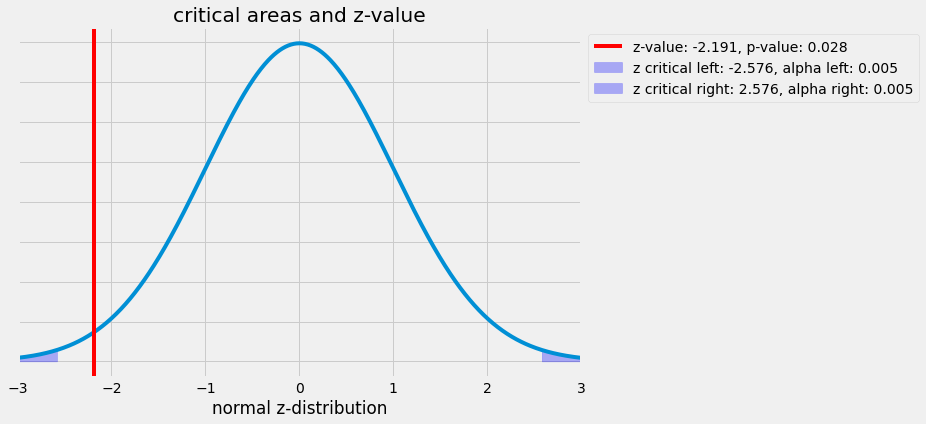

In [6]:
# defining x and y
normal_distribution = pd.DataFrame({
    'x': np.arange(-3, 3, 0.01),
    'y': stats.norm.pdf(np.arange(-3, 3, 0.01), 0, 1)
})

x = normal_distribution['x']
y = normal_distribution['y']

# establishing critical areas
# left:
x_critical_left = normal_distribution.loc[normal_distribution['x'] < -z_critical, 'x']
y_critical_left = normal_distribution.loc[normal_distribution['x'] < -z_critical, 'y']
# right:
x_critical_right = normal_distribution.loc[normal_distribution['x'] > z_critical, 'x']
y_critical_right = normal_distribution.loc[normal_distribution['x'] > z_critical, 'y']


# building the plot
fig, ax = plt.subplots(figsize=(9, 6))
plt.style.use('fivethirtyeight')
ax.plot(x, y)

# painting critical areas
# left:
ax.fill_between(x_critical_left, y_critical_left, 0, alpha=0.3, color='b', 
                label=f'z critical left: {round(-z_critical, 3)}, alpha left: {alpha/n_sided}')
# right:
ax.fill_between(x_critical_right, y_critical_right, 0, alpha=0.3, color='b', 
                label=f'z critical right: {round(z_critical, 3)}, alpha right: {alpha/n_sided}')

# drawing z-value line
ax.axvline(x=z, color='r', label=f'z-value: {round(z, 3)}, p-value: {round(p_value, 3)}')

# decorating the plot
ax.set_xlim([-3, 3])
ax.set_xlabel('normal z-distribution')
ax.set_yticklabels([])  # to remove y-bar
ax.set_title('critical areas and z-value')
ax.legend(bbox_to_anchor = (1.0, 1), loc='upper left')

# plt.savefig('normal_curve.png', dpi=72, bbox_inches='tight')
plt.show()

we do not reject $H_0$ at 1% of significance as $z_critical (-2.57) < z (-2.19) < z_critical (2.57)$ or p-value (0.028) > alpha (0.01)

## Testing for μ when σ is unknown

https://www.youtube.com/watch?v=Z8E3hi8INZk&list=PLTNMv857s9WXg9tRi7wHU9cMgL1x140dO&index=5

## $$t = \frac{\overline X-\mu}{s/\sqrt{n}}$$

where:

### $$s^2=\frac{\sum(X-\overline X)^2}{n-1}$$

### example 3 - left-sided test

An online fashion store called Showdonkey advertises that its average delivery time is less than six hours. A random sample of the amount of time taken to deliver packages produced the following delivery times (rounded to the nearest hour): 7, 3, 4, 6, 10, 5, 6, 4, 3, 8. Is there enough evidence to support Showdonkey's advertisement at the 5% significance?

so we have:

$$H_0: \mu = 6$$
$$H_1: \mu < 6$$

we calculate t-statistic, and not z, because we don't know what the population standard deviation is

In [7]:
mu_population = 6

sample = np.array([7, 3, 4, 6, 10, 5, 6, 4, 3, 8])
sample_mean = sample.mean()
n = len(sample)
df = n - 1
s = (sum((sample - sample_mean) ** 2) / df) ** 0.5

n_sided = 1  # because it's left-sided test
alpha = 0.05

t_critical = stats.t.ppf(1 - 0.05 / n_sided, df=9)  # calculation of boundaries of critical area 
                                                     # in t-scale (student's t-distribution);
                                                     # t_critical is negative due to it's left-sided test   
t = (sample_mean - mu_population) / (s / (n ** 0.5))

# t to p_value
p_value = (1 - stats.t.cdf(abs(t), df=9)) * n_sided
# p_value = stats.t.sf(abs(t), df=9)  # alternative form

print(f't critical:\t {-t_critical}')
print('t-value:\t', t)
print('p-value:\t', p_value)
print('t-value/p-value not in critical area\n:\t\t', -t_critical < t and p_value > alpha)

t critical:	 -1.8331129326536335
t-value:	 -0.5570860145311562
p-value:	 0.29552561589180204
t-value/p-value not in critical area
:		 True


#### let's illustrate our findings with the following plot:

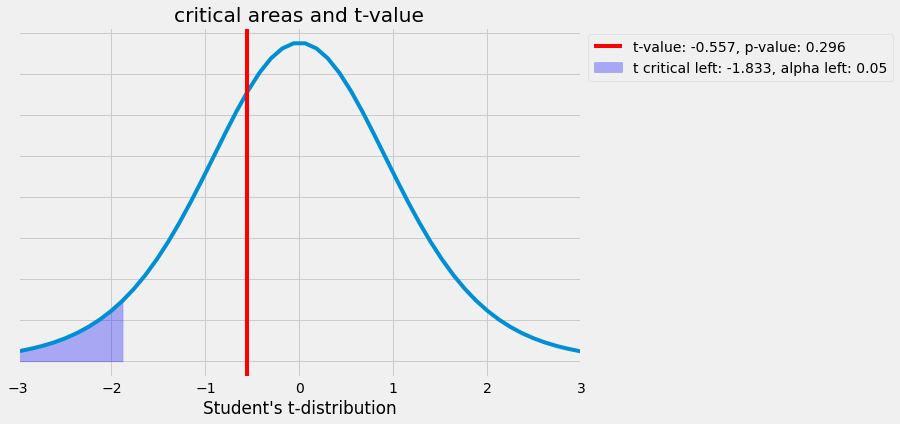

In [8]:
# defining x and y
rv = stats.t(df=9, loc=0, scale=1)
x = np.linspace(rv.ppf(0.0001), rv.ppf(0.9999), 100)
y = rv.pdf(x)

students_t_distribution = pd.DataFrame({
    'x': x,
    'y': y
})

# establishing critical areas
# left:
x_critical_left = students_t_distribution.loc[students_t_distribution['x'] < -t_critical, 'x']
y_critical_left = students_t_distribution.loc[students_t_distribution['x'] < -t_critical, 'y']
# right:
# x_critical_right = students_t_distribution.loc[normal_distribution['x'] > z_critical, 'x']
# y_critical_right = students_t_distribution.loc[normal_distribution['x'] > z_critical, 'y']


# building the plot
fig, ax = plt.subplots(figsize=(9, 6))
plt.style.use('fivethirtyeight')
ax.plot(x, y)

# painting critical areas
# left:
ax.fill_between(x_critical_left, y_critical_left, 0, alpha=0.3, color='b', 
                label=f't critical left: {round(-t_critical, 3)}, alpha left: {alpha/n_sided}')
# right:
# ax.fill_between(x_critical_right, y_critical_right, 0, alpha=0.3, color='b', 
#                 label=f't critical right: {round(t_critical, 3)}, alpha right: {alpha/n_sided}')

# drawing t-value line
ax.axvline(x=t, color='r', label=f't-value: {round(t, 3)}, p-value: {round(p_value, 3)}')

# decorating the plot
ax.set_xlim([-3, 3])
ax.set_xlabel('Student\'s t-distribution')
ax.set_yticklabels([])  # to remove y-bar
ax.set_title('critical areas and t-value')
ax.legend(bbox_to_anchor = (1.0, 1), loc='upper left')

# plt.savefig('normal_curve.png', dpi=72, bbox_inches='tight')
plt.show()

we do not reject $H_0$ at 5% of significance as $t (-0.55) > t_critical (-1.83)$ or p-value (0.29) > alpha (0.05)

## Testing for the population proportion, p (or π)

https://www.youtube.com/watch?v=bh_5Yr3YjO0&list=PLTNMv857s9WXg9tRi7wHU9cMgL1x140dO&index=6

### example 4

Gigi's pizza surveys its customers. On the basis of these surveys, the management of the chain claims that at least 75% of its customers rate the food as excellent. A consumer testing service wants to examine the claim by asking 460 customers to rate the food. 71% rated the food as excellent. Is there enough evidence at the 5% and 1% level of significance to reject management's claim?

so we have:

#### $$H_0: p = 0.75$$
#### $$H_1: p < 0.75$$

we have got 3 importantpieces of information:

#### $\hat p = 0.71$

#### $p = 0.75$

#### $n = 460$

the underlying distribution here is binomial or Bernoulli distribution

as n * p > 5 and n * (1 - p) > 5, C.L.T. applies

or, the more n is, the more distribution of sample mean/sample statistic becomes more like a normal distribution

so, test statistic will be approximately normally distributed, enough that we can use our z-distribution:

### $$z = \frac{\hat p - p}{\sqrt{\frac{p(1-p)}{n}}} \approx N(0,1)$$

In [9]:
pi = 0.75
pi_hat = 0.71
n = 460

n_sided = 1  # because it's left-sided test
alpha_1 = 0.05
alpha_2 = 0.01

z_critical_1 = stats.norm.ppf(1 - alpha_1 / n_sided)  # calculation of boundaries of critical area in z-scale
z_critical_2 = stats.norm.ppf(1 - alpha_2 / n_sided)
z = (pi_hat - pi) / ((pi * (1 - pi) / n) ** 0.5)  # calculation of z-value

# z to p_value
p_value = (1 - stats.norm.cdf(abs(z))) * n_sided
# p_value = stats.norm.sf(abs(z)) * n_sided  # alternative form

print(f'z critical for 5%:\t {-z_critical_1}')
print(f'z critical for 1%:\t {-z_critical_2}')
print('z-value:\t\t', z)
print('p-value:\t\t', p_value)
print('z-value or p-value not in critical area for 5%\n:\t\t\t', z > -z_critical_1 and p_value > alpha_1)
print('z-value or p-value not in critical area for 1%\n:\t\t\t', z > -z_critical_2 and p_value > alpha_2)

z critical for 5%:	 -1.6448536269514722
z critical for 1%:	 -2.3263478740408408
z-value:		 -1.9812453995740509
p-value:		 0.023781880097470287
z-value or p-value not in critical area for 5%
:			 False
z-value or p-value not in critical area for 1%
:			 True


#### let's illustrate our findings with the following plot:

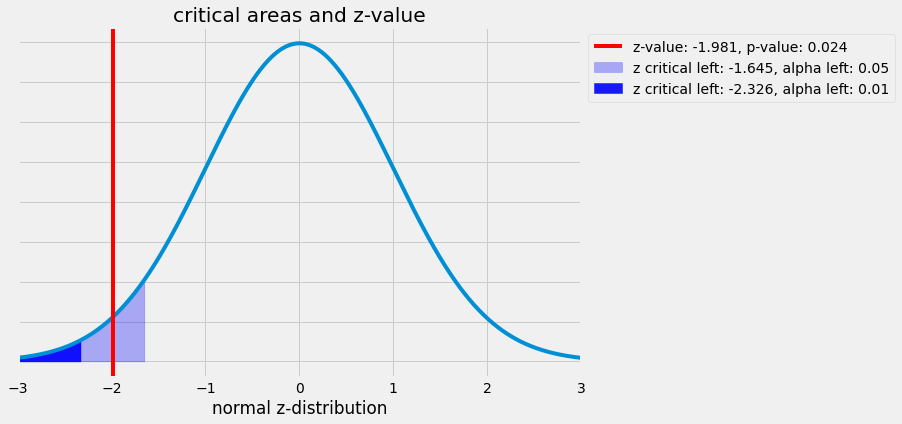

In [10]:
# defining x and y
normal_distribution = pd.DataFrame({
    'x': np.arange(-3, 3, 0.01),
    'y': stats.norm.pdf(np.arange(-3, 3, 0.01), 0, 1)  # stats.norm.pdf(x, 0, 1)
})

x = normal_distribution['x']
y = normal_distribution['y']

# establishing critical areas
# left:
x_critical_left_1 = normal_distribution.loc[normal_distribution['x'] < -z_critical_1, 'x']
y_critical_left_1 = normal_distribution.loc[normal_distribution['x'] < -z_critical_1, 'y']

x_critical_left_2 = normal_distribution.loc[normal_distribution['x'] < -z_critical_2, 'x']
y_critical_left_2 = normal_distribution.loc[normal_distribution['x'] < -z_critical_2, 'y']

# right:
# x_critical_right = normal_distribution.loc[normal_distribution['x'] > z_critical, 'x']
# y_critical_right = normal_distribution.loc[normal_distribution['x'] > z_critical, 'y']



# building the plot
fig, ax = plt.subplots(figsize=(9,6))
plt.style.use('fivethirtyeight')
ax.plot(x, y)

# painting critical areas
# left:
ax.fill_between(x_critical_left_1, y_critical_left_1, 0, alpha=0.3, color='b', 
                label=f'z critical left: {round(-z_critical_1, 3)}, alpha left: {alpha_1/n_sided}')
ax.fill_between(x_critical_left_2, y_critical_left_2, 0, alpha=0.9, color='b', 
                label=f'z critical left: {round(-z_critical_2, 3)}, alpha left: {alpha_2/n_sided}')
# right:
# ax.fill_between(x_critical_right, y_critical_right, 0, alpha=0.3, color='b', 
#                 label=f'z critical right: {round(z_critical, 3)}, alpha right: {alpha/n_sided}')

# drawing z-value line
ax.axvline(x=z, color='r', label=f'z-value: {round(z, 3)}, p-value: {round(p_value, 3)}')

# decorating the plot
ax.set_xlim([-3, 3])
ax.set_xlabel('normal z-distribution')
ax.set_yticklabels([])  # to remove y-bar
ax.set_title('critical areas and z-value')
ax.legend(bbox_to_anchor = (1.0, 1), loc='upper left')

# plt.savefig('normal_curve.png', dpi=72, bbox_inches='tight')
plt.show()

we reject $H_0$ at 5% of significance as z (-1.981) $\not >$ z_critical (-1.645) or p-value (0.024) $\not >$ alpha (0.05)

we do not reject $H_0$ at 1% of significance as z (-1.981) > z_critical (-2.326) or p-value (0.024) > alpha (0.01)

## Chi-squared Test for Independence

https://www.youtube.com/watch?v=NTHA9Qa81R8&list=PLTNMv857s9WXg9tRi7wHU9cMgL1x140dO&index=10

### example 5:

120 people are surveyed for their preferred social media platform. Is there enough evidence to suggest social media presence is independent of sex?

the given data:

In [11]:
observed_frequencies = pd.DataFrame({
    'social_media_platform': ['facebook', 'instagram', 'tik tok'],
    'male': [15, 30, 5],
    'female': [20, 35, 15]
})

observed_frequencies['TOTAL'] = observed_frequencies['male'] + observed_frequencies['female']

observed_frequencies = observed_frequencies.append({
    'social_media_platform': 'TOTAL', 
    'male': observed_frequencies['male'].sum(),
    'female': observed_frequencies['female'].sum(),
    'TOTAL': observed_frequencies['TOTAL'].sum()
}, ignore_index=True)

observed_frequencies.set_index('social_media_platform', inplace=True)
observed_frequencies

,male,female,TOTAL
social_media_platform,,,
facebook,15,20,35
instagram,30,35,65
tik tok,5,15,20
TOTAL,50,70,120


so, we have:

__H 0__: social media preserence is independent of sex

__H 1__: social media preserence is NOT independent of sex

#### let's find expected frequencies (if they were independent):

if independent, P(A and B) = P(A) * P(B)

if independent, E(joint probability) = marginal probability * marginal probability

E('male' and 'facebook') = (35 * 50)/120; E('male' and 'instagram') = (65 * 50)/120 ...

In [12]:
expected_frequencies = observed_frequencies.copy()

expected_frequencies.iloc[:3, 0] =\
    (expected_frequencies.iloc[:3, 2] * expected_frequencies.iloc[3, 0]) / expected_frequencies.loc['TOTAL', 'TOTAL']
expected_frequencies.iloc[:3, 1] =\
    (expected_frequencies.iloc[:3, 2] * expected_frequencies.iloc[3, 1]) / expected_frequencies.loc['TOTAL', 'TOTAL']

expected_frequencies

,male,female,TOTAL
social_media_platform,,,
facebook,14.583333,20.416667,35
instagram,27.083333,37.916667,65
tik tok,8.333333,11.666667,20
TOTAL,50.000000,70.000000,120


### test statistic:

### $$x^2 = \sum{\frac{(o-e)^2}{e}} \sim x^2 (DF=2)$$

where:

o - observed frequencies

e - expected frequencies

__condition__: all expected frequencies are > 5 !!!

about chi2 distribution: https://www.youtube.com/watch?v=hcDb12fsbBU

#### let's calculate chi2:

In [13]:
chi2 = ((observed_frequencies.iloc[:3, :2] -\
        expected_frequencies.iloc[:3, :2]) ** 2 /\
       expected_frequencies.iloc[:3, :2])[['male', 'female']].sum().sum()
chi2

2.8445839874411307

#### let's calculate degrees of freedom:

df = (row - 1) * (columns - 1)

In [14]:
df = (3 - 1) * (2 - 1)
df

2

#### let's calculate critical area for chi2:

In [15]:
alpha = 0.05
chi2_critical = stats.chi2.ppf(q=1-alpha, df=2)  # calculation of boundaries of critical area
chi2_critical

5.991464547107979

#### let's calculate p-value for chi2:

In [16]:
p_value = 1 - stats.chi2.cdf(chi2, df=df)
p_value

0.24116064429365147

#### let's calculate chi2 using standard function:

### stats.chi2_contingency(observed_frequencies) is here to solve all the calculations above!!!

In [17]:
observed_frequencies = observed_frequencies.iloc[:3, :2]
observed_frequencies

,male,female
social_media_platform,,
facebook,15,20
instagram,30,35
tik tok,5,15


In [18]:
chi2, p_value, df, expected_frequencies = stats.chi2_contingency(observed_frequencies)
chi2, p_value, df, expected_frequencies

(2.8445839874411307,
 0.2411606442936515,
 2,
 array([[14.58333333, 20.41666667],
        [27.08333333, 37.91666667],
        [ 8.33333333, 11.66666667]]))

### alternative calculation with researchpy:

In [19]:
# # !pip install researchpy
# import researchpy
# crosstab, res, exp = researchpy.crosstab(df['column_1'], # there must be columns from a df, not aggregated data
#                                          df['column_2'], 
#                                          test='chi-square', 
#                                          expected_freqs=True)

#### let's illustrate our findings with the following plot:

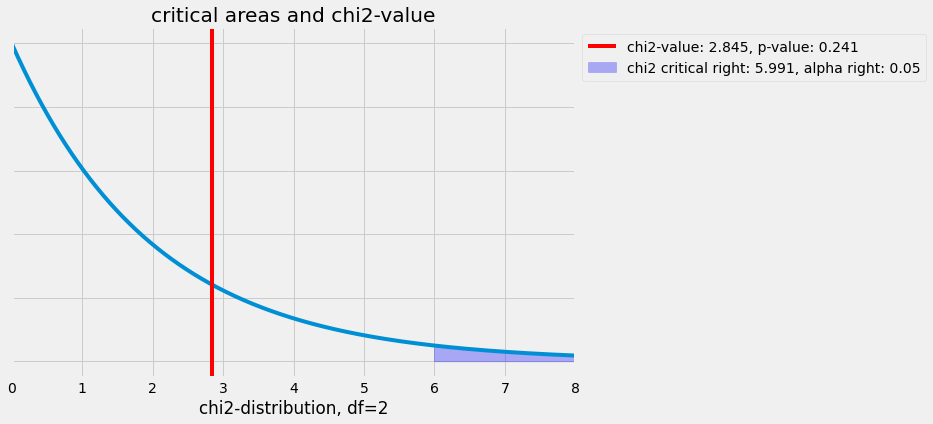

In [20]:
# defining x and y
chi2_distribution = pd.DataFrame({
    'x': np.arange(0, 10, 0.001),
    'y': stats.chi2.pdf(np.arange(0, 10, 0.001), df=2)  # stats.chi2.pdf(x, df=2)
})

x = chi2_distribution['x']
y = chi2_distribution['y']

# establishing critical areas
# right:
x_critical_right = chi2_distribution.loc[chi2_distribution['x'] > chi2_critical, 'x']
y_critical_right = chi2_distribution.loc[chi2_distribution['x'] > chi2_critical, 'y']


# building the plot
fig, ax = plt.subplots(figsize=(9,6))
plt.style.use('fivethirtyeight')
ax.plot(x, y)

# painting critical areas
# right:
ax.fill_between(x_critical_right, y_critical_right, 0, alpha=0.3, color='b', 
                label=f'chi2 critical right: {round(chi2_critical, 3)}, alpha right: {alpha}')

# drawing z-value line
ax.axvline(x=chi2, color='r', label=f'chi2-value: {round(chi2, 3)}, p-value: {round(p_value, 3)}')

# decorating the plot
ax.set_xlim([0, 8])
ax.set_xlabel('chi2-distribution, df=2')
ax.set_yticklabels([])  # to remove y-bar
ax.set_title('critical areas and chi2-value')
ax.legend(bbox_to_anchor = (1.0, 1), loc='upper left')

# plt.savefig('normal_curve.png', dpi=72, bbox_inches='tight')
plt.show()

we do not reject $H_0$ at 5% of significance as chi2 (2.845) < chi2_critical (5.991) or p-value (0.241) > alpha (0.05)

## Chi-squared Goodness of Fit Test

https://www.youtube.com/watch?v=ZNXso_riZag&list=PLTNMv857s9WXg9tRi7wHU9cMgL1x140dO&index=7

### example 6:

    In an art class of 75 students, 11 students are left-handed. Does this class fit the prevailing theory that 12% of people are left-handed?

In [21]:
frequencies = pd.DataFrame({
    'handed': ['left-handed', 'right-handed', 'TOTAL'],
    'observed': [11, 64, 75],
    'expected': [9, 66, 75]  # 12% * 75 = 9
})

frequencies.set_index('handed', inplace=True)
frequencies

,observed,expected
handed,,
left-handed,11,9
right-handed,64,66
TOTAL,75,75


so, we have: 

__H 0__: 12% of people are left-handed; $\pi = 0.12$

__H 1__: the prevailing theory is incorrect; $\pi \not= 0.12$

level of significance = 5%

### test statistic:

### $$x^2 = \sum{\frac{(o-e)^2}{e}} \sim x^2 (DF=1)$$

where:

o - observed frequencies

e - expected frequencies

__condition__: all expected frequencies are > 5 !!!

#### let's calculate chi2:

### $$x^2 (DF=1) = \sum{\frac{(o-e)^2}{e}} = \frac{(11-9)^2}{9} + \frac{(64-66)^2}{66} = 0.505050505050505$$

In [22]:
frequencies_observed = frequencies.iloc[:2, 0]
frequencies_expected = frequencies.iloc[:2, 1]

chi2 = ((frequencies_observed - frequencies_expected) ** 2 / frequencies_expected).sum()
chi2

0.505050505050505

#### let's calculate critical area for chi2:

In [23]:
alpha = 0.05
df = 1
chi2_critical = stats.chi2.ppf(q=1-alpha, df=df)  # calculation of boundaries of critical area
chi2_critical

3.841458820694124

#### let's calculate p-value for chi2:

In [24]:
p_value = 1 - stats.chi2.cdf(chi2, df=df)
p_value

0.4772893402694306

#### let's calculate chi2 using standard function:

### stats.chisquare(f_obs=..., f_exp=...) is here to solve all the calculations above!!!

In [25]:
chi2, p_value = stats.chisquare(f_obs=frequencies_observed, f_exp=frequencies_expected)
chi2, p_value

(0.505050505050505, 0.4772893402694306)

#### let's illustrate our findings with the following plot:

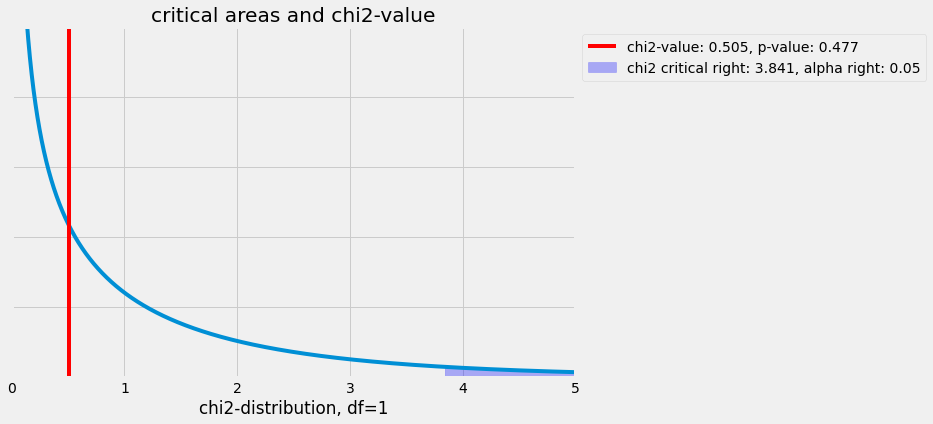

In [26]:
# defining x and y
chi2_distribution = pd.DataFrame({
    'x': np.arange(0, 10, 0.001),
    'y': stats.chi2.pdf(np.arange(0, 10, 0.001), df=df)  # stats.chi2.pdf(x, df=df)
})

x = chi2_distribution['x']
y = chi2_distribution['y']

# establishing critical areas
# right:
x_critical_right = chi2_distribution.loc[chi2_distribution['x'] > chi2_critical, 'x']
y_critical_right = chi2_distribution.loc[chi2_distribution['x'] > chi2_critical, 'y']


# building the plot
fig, ax = plt.subplots(figsize=(9,6))
plt.style.use('fivethirtyeight')
ax.plot(x, y)

# painting critical areas
# right:
ax.fill_between(x_critical_right, y_critical_right, 0, alpha=0.3, color='b', 
                label=f'chi2 critical right: {round(chi2_critical, 3)}, alpha right: {alpha}')

# drawing chi2-value line
ax.axvline(x=chi2, color='r', label=f'chi2-value: {round(chi2, 3)}, p-value: {round(p_value, 3)}')

# decorating the plot
ax.set_xlim([0, 5])
ax.set_ylim([0, 1])  # limited y to see the critical area!!!
ax.set_xlabel(f'chi2-distribution, df={df}')
ax.set_yticklabels([])  # to remove y-bar
ax.set_title('critical areas and chi2-value')
ax.legend(bbox_to_anchor = (1.0, 1), loc='upper left')

# plt.savefig('normal_curve.png', dpi=72, bbox_inches='tight')
plt.show()

we do not reject $H_0$ at 5% of significance as chi2 (0.505) < chi2_critical (3.841) or p-value (0.477) > alpha (0.05)

### example 7:

    Out of 600 throws in a Scissors-Paper-Rock competitionthere there were 235 rocks, 194 scissors and 171 papers thrown. Is there evidence of a "weapon" preference (at the 5% level of significance)?

In [27]:
frequencies = pd.DataFrame({
    'handed': ['rock', 'paper', 'scissors', 'TOTAL'],
    'observed': [235, 194, 171, 600],
    'expected': [200, 200, 200, 600]
})

frequencies.set_index('handed', inplace=True)
frequencies

,observed,expected
handed,,
rock,235,200
paper,194,200
scissors,171,200
TOTAL,600,600


so, we have: 

__H 0__: $\pi_r=\pi_p=\pi_s$

__H 1__: at least one $\pi_i \not= \pi_j$

level of significance = 5%

### test statistic:

### $$x^2 = \sum{\frac{(o-e)^2}{e}} \sim x^2 (DF=2)$$

#### let's calculate chi2:

In [28]:
frequencies_observed = frequencies.iloc[:3, 0]
frequencies_expected = frequencies.iloc[:3, 1]

chi2 = ((frequencies_observed - frequencies_expected) ** 2 / frequencies_expected).sum()
chi2

10.51

#### let's calculate critical area for chi2:

In [29]:
alpha = 0.05
df = 2
chi2_critical = stats.chi2.ppf(q=1-alpha, df=df)  # calculation of boundaries of critical area
chi2_critical

5.991464547107979

#### let's calculate p-value for chi2:

In [30]:
p_value = 1 - stats.chi2.cdf(chi2, df=df)
p_value

0.005221346291978679

#### let's calculate chi2 using standard function:

In [31]:
chi2, p_value = stats.chisquare(f_obs=frequencies_observed, f_exp=frequencies_expected)
chi2, p_value

(10.51, 0.0052213462919786825)

#### let's illustrate our findings with the following plot:

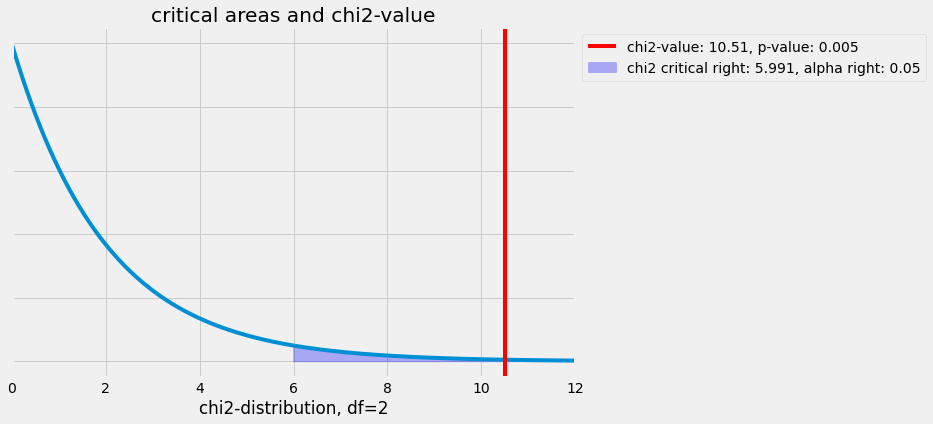

In [32]:
# defining x and y
chi2_distribution = pd.DataFrame({
    'x': np.arange(0, 12, 0.001),
    'y': stats.chi2.pdf(np.arange(0, 12, 0.001), df=df)  # stats.chi2.pdf(x, df=df)
})

x = chi2_distribution['x']
y = chi2_distribution['y']

# establishing critical areas
# right:
x_critical_right = chi2_distribution.loc[chi2_distribution['x'] > chi2_critical, 'x']
y_critical_right = chi2_distribution.loc[chi2_distribution['x'] > chi2_critical, 'y']


# building the plot
fig, ax = plt.subplots(figsize=(9,6))
plt.style.use('fivethirtyeight')
ax.plot(x, y)

# painting critical areas
# right:
ax.fill_between(x_critical_right, y_critical_right, 0, alpha=0.3, color='b', 
                label=f'chi2 critical right: {round(chi2_critical, 3)}, alpha right: {alpha}')

# drawing chi2-value line
ax.axvline(x=chi2, color='r', label=f'chi2-value: {round(chi2, 3)}, p-value: {round(p_value, 3)}')

# decorating the plot
ax.set_xlim([0, 12])
# ax.set_ylim([0, 1])  # limited y to see the critical area!!!
ax.set_xlabel(f'chi2-distribution, df={df}')
ax.set_yticklabels([])  # to remove y-bar
ax.set_title('critical areas and chi2-value')
ax.legend(bbox_to_anchor = (1.0, 1), loc='upper left')

# plt.savefig('normal_curve.png', dpi=72, bbox_inches='tight')
plt.show()

we reject $H_0$ at 5% of significance as chi2 (10.51) > chi2_critical (5.991) or p-value (0.005) < alpha (0.05)